### Example of a company that could run an A/B test 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Parameters for the simulation
visitors_a, visitors_b = 1000, 1000
conversion_rate_a, conversion_rate_b = 0.10, 0.12

# Simulating conversions based on binomial distribution
conversions_a = np.random.binomial(visitors_a, conversion_rate_a)
conversions_b = np.random.binomial(visitors_b, conversion_rate_b)

#DataFrame to hold the simulated data
data = pd.DataFrame({
    'Group': ['A', 'B'],
    'Visitors': [visitors_a, visitors_b],
    'Conversions': [conversions_a, conversions_b]
})

data['Conversion Rate'] = data['Conversions'] / data['Visitors']
data


,Group,Visitors,Conversions,Conversion Rate
0,A,1000,96,0.096
1,B,1000,122,0.122


In [12]:
from statsmodels.stats.proportion import proportions_ztest

# Counts of successes (conversions) in each group
counts = np.array([conversions_a, conversions_b])

# Number of observations in each group
nobs = np.array([visitors_a, visitors_b])

# Perform the Z-test for proportion
stat, pval = proportions_ztest(counts, nobs)

print(f'Z-statistic: {stat}')
print(f'P-value: {pval}')

Z-statistic: -1.8655472326393594
P-value: 0.06210473809105926


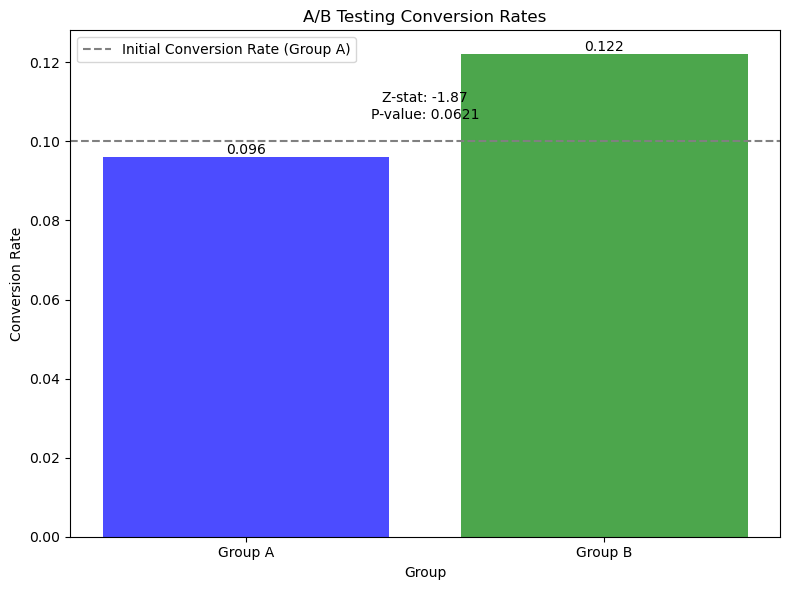

In [9]:
# Conversion rates for plotting
conversion_rates = data['Conversion Rate'].values

# Labels for groups
labels = ['Group A', 'Group B']

# Bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, conversion_rates, color=['blue', 'green'], alpha=0.7)

# Highlighting the p-value and Z-statistic
plt.axhline(y=0.1, color='gray', linestyle='--', label='Initial Conversion Rate (Group A)')
plt.text(0.5, 0.105, f'Z-stat: {stat:.2f}\nP-value: {pval:.4f}', ha='center', va='bottom')

# Adding titles and labels
plt.title('A/B Testing Conversion Rates')
plt.ylabel('Conversion Rate')
plt.xlabel('Group')
plt.legend()

#text for showing conversion rate
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

plt.tight_layout()
plt.show()
